# Predicting Profit of Start Ups in Florida, New York & California - Machine Learning

In the following project, we will analyse data from 200 start-ups from Florida, New York & California and try to predict the income for these start-ups.

We will perform data cleaning, exploratory analysis, and test different machine learning algorithms to find the model, allowing us best to predict the profit of upcoming start-ups in this area.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file=r"/content/50_Startups.csv"
df=pd.read_csv(file)
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


As we can see, the data types make sense and we do not have any missing values.

Just for illustration purposes, we will perform the calculation, to check if we have any NaN Values.

In [ ]:
(df.isnull().sum()/len(df))*100

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

In [ ]:
# just for convinence the columnheaders have been transformed to lower case
df.columns=df.columns.str.lower()
df.head()

,r&d spend,administration,marketing spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.describe()

,r&d spend,administration,marketing spend,profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


Here we can see that some start-ups have not spent money on "r&d spend" and "marketing spend".
At the same time, at least one start-up has spent 471784.10$ on marketing.

With .describe() we get a general overview of what our data looks like.

In [ ]:
# determining how well a start up has performed, based on category levels
# the thresholds have been selected from the percentiles of our y feature "profit"
def profit_cat(x):
    if x <= 90138.902500:
        return 'low'
    elif x <= 107978.190000:
        return 'middle'
    elif x <= 139765.977500:
        return 'good'
    else:
        return 'great'

In [ ]:
df['profit_category']=df['profit'].apply(profit_cat)
df.head()

,r&d spend,administration,marketing spend,state,profit,profit_category
0,165349.20,136897.80,471784.10,New York,192261.83,great
1,162597.70,151377.59,443898.53,California,191792.06,great
2,153441.51,101145.55,407934.54,Florida,191050.39,great
3,144372.41,118671.85,383199.62,New York,182901.99,great
4,142107.34,91391.77,366168.42,Florida,166187.94,great


# Exploratory Analysis

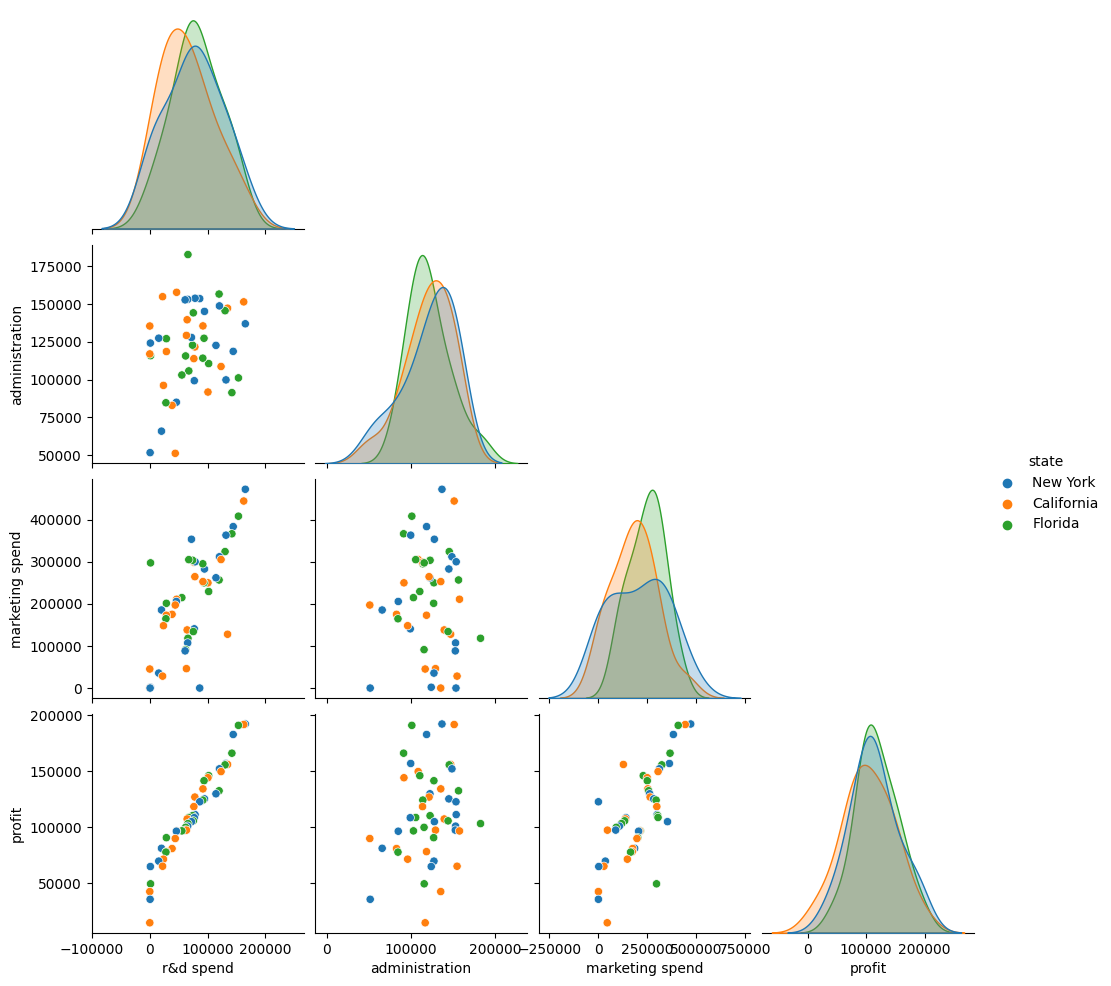

In [ ]:
sns.pairplot(df, hue='state', corner=True)

When we focus on the "profit" row, we can see that "profit-r&d spend" and "profit-marketing spend" follow a linear trend, but the administration does not. Let's check how the different features correlate with each other.

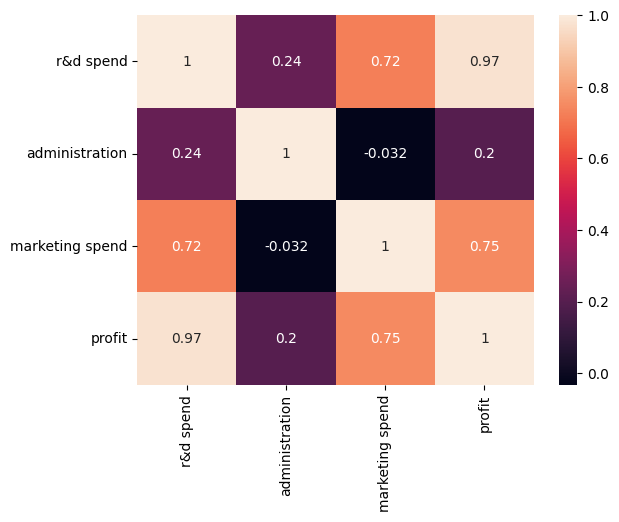

In [ ]:
sns.heatmap(df.corr(), annot=True)
plt.show()

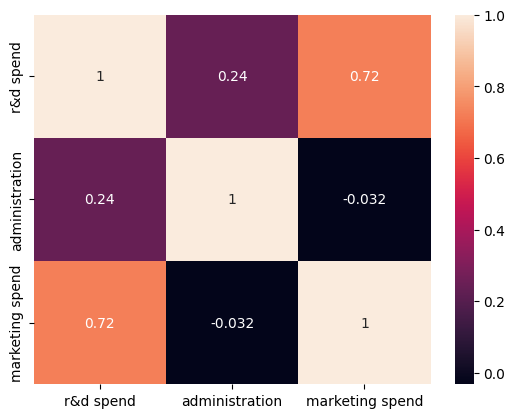

In [ ]:
# as we can see there is some sort of auto correlation between the X features
sns.heatmap(df.drop(['profit'], axis=1).corr(), annot=True)
plt.show()

Administration has the lowest correlation with profit. The other features do have a strong correlation with the y feature. It is essential to mention that "r&d spend" and "marketing spend" have strong autocorrelation.

We can use a feature importance analysis and drop features in future studies. In this project, we will continue with all features.

### Summary of Exploratory Analysis

### profit - r&d spend
We can see here a strong linear relationship/behaviour

### profit - administration
Here we do not really see a linear trend=> will be dropped

### profit - marketing spend
There is a linear trend but not as strong as between "profit - r&d spend"

## Possible Models
- Multipel Linear Regression

- ElasticNet=> due to autocorrolation

- SGD Regression => when we have less than 100.000 samples

- LinearSVM

- DecisionTreeRegression

- RandomForestRegression

We will use the mean absolute error (MAE) as an evaluation metric. We will not use R-squared because we do not want to determine if the variables/features fit well and how much they explain the variance in the y feature; we wish to predict accurate profits. Therefore, we use the mean absolute error.

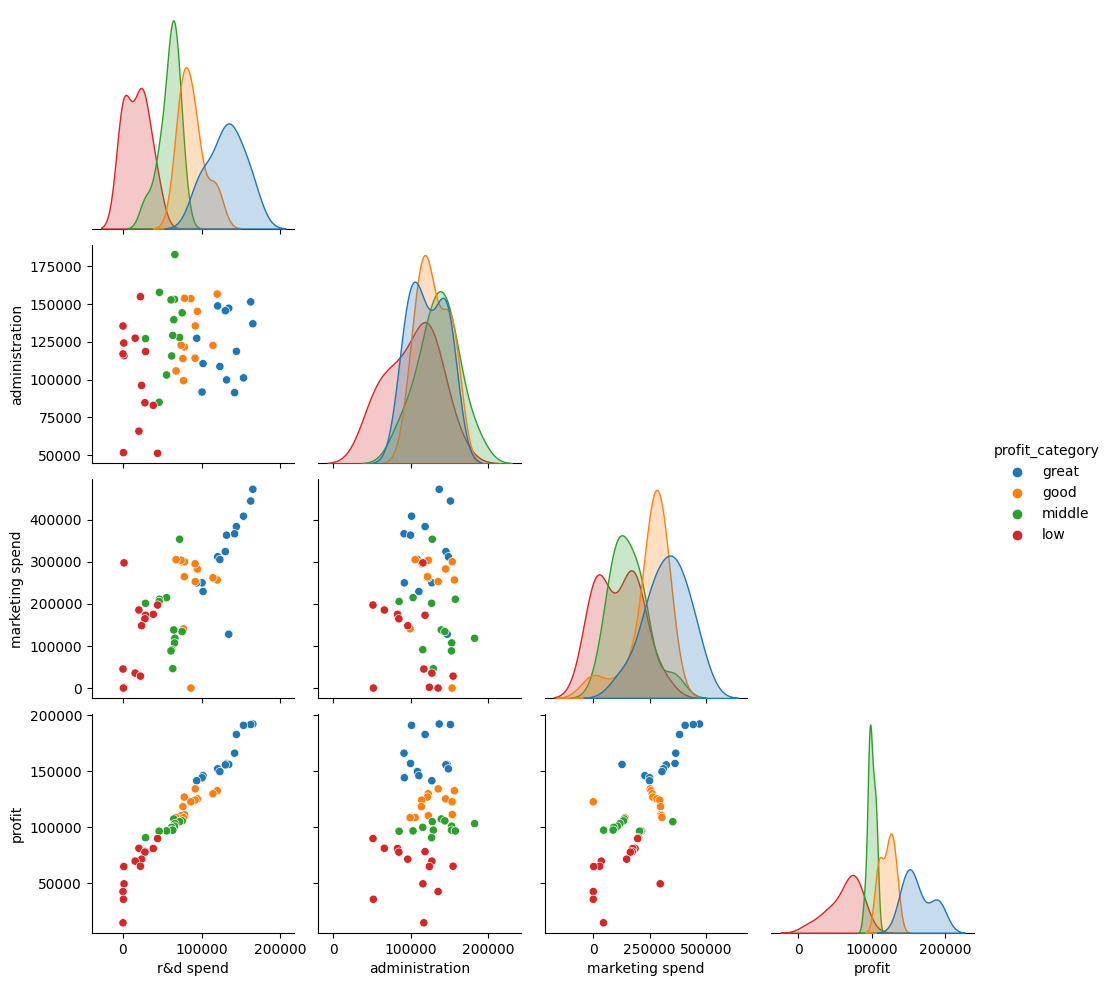

In [ ]:
# lets create a pairplot based on the profit category
sns.pairplot(df, hue='profit_category', corner=True)
plt.show()

The pairplot indicates that the more you spend, the more profit you generate. Another important aspect that becomes visible is that our X features tend to be normally distributed. This is important when we use models which need scaling. With a normal distribution, we can use the StandardScaler.

Let's check how the different categories are distributed.

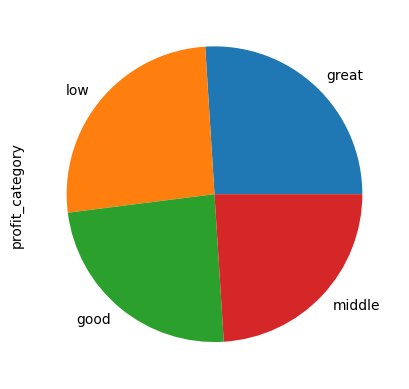

great     13
low       13
good      12
middle    12
Name: profit_category, dtype: int64


In [ ]:
# the data is more or less balanced when it comes to the different profit categories
df['profit_category'].value_counts().plot(kind='pie')
plt.show()
print(df['profit_category'].value_counts())

# Model Implementation
## Dealing with the Categorical Data

In [ ]:
# we use pd.get_dummies() to transform the categorical values to numerical values
X=pd.get_dummies(df.drop(['profit', 'profit_category'], axis=1),drop_first=True)
y=df['profit']

Next, we create a baseline model to see what our different models need to beat.

# Getting a Baseline for the Models

In [ ]:
from sklearn.dummy import DummyRegressor
base_dummy=DummyRegressor()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [ ]:
base_dummy.fit(X_train, y_train)

DummyRegressor()

In [ ]:
from sklearn.model_selection import cross_validate

scores=cross_validate(base_dummy, X_train, y_train, cv=10, scoring='neg_mean_absolute_error',return_train_score=True)
(scores.keys())
sorted(['train_score', 'test_score'])
# baseline_model_mae=(scores.mean())*-1
# print('Average MAE of the baseline model: ',baseline_model_mae)
print('Train Score: ', sorted(scores['train_score']))
print("\n")
print('Average Train Score: ', scores['train_score'].mean()*-1)
print("\n")
print('Test Score: ', sorted(scores['test_score']))
print("\n")
print('Average Test Score: ', scores['test_score'].mean()*-1)

Train Score:  [-32852.813333333324, -32571.14595679012, -32477.85950617284, -32255.154444444444, -32153.85679012345, -31682.041388888883, -31549.454413580243, -31352.44311728395, -30145.169027777778, -29247.59479938271]


Average Train Score:  31628.753277777774


Test Score:  [-55904.490694444445, -44231.869999999995, -34914.97749999999, -32358.117499999997, -31150.438472222235, -27316.8525, -25474.44874999999, -24350.7575, -23482.293472222213, -21106.955555555563]


Average Test Score:  32029.12019444444


That is the baseline performance we compete against with all the models we will train on.

## Scaling the Data

In [ ]:
# for the models which need scaled features, we are required to scale the data for those models
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

# scaling X_train and X_test
scaled_X_train=scale.fit_transform(X_train)
scaled_X_test=scale.transform(X_test)

## Multipel Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
# KFold is a very common cross-valaidation approch for regression problems

linear=LinearRegression()

param_lr={'fit_intercept':[True,False], 'fit_intercept':[True,False], 'positive':[True,False]}

cv=KFold(n_splits=10, shuffle=True, random_state=101)

linear_cv=RandomizedSearchCV(linear, param_distributions=param_lr, cv=cv, n_iter=500,
                             scoring='neg_mean_absolute_error', random_state=101, return_train_score=True)

In [ ]:
linear_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   estimator=LinearRegression(), n_iter=500,
                   param_distributions={'fit_intercept': [True, False],
                                        'positive': [True, False]},
                   random_state=101, return_train_score=True,
                   scoring='neg_mean_absolute_error')

In [ ]:
# As we can see our model is not overfitting nor underfitting
linear_cv.cv_results_.keys()
print(sorted(linear_cv.cv_results_['mean_train_score']))
print(sorted(linear_cv.cv_results_['mean_test_score']))

[-10035.165846270036, -10035.165846264066, -6835.905887210451, -6800.231155391184]
[-12340.198577339661, -12340.198577302206, -8901.842290796933, -8575.25544597822]


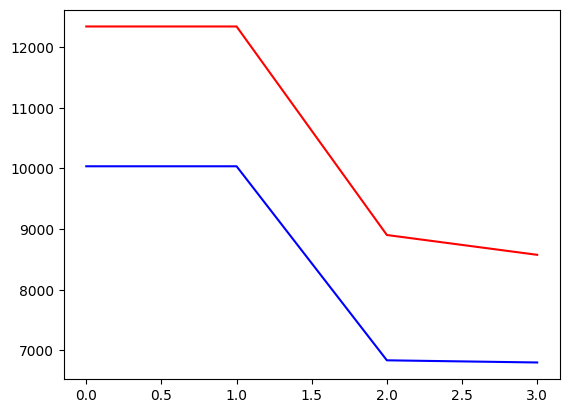

In [ ]:
linear_cv.cv_results_.keys()
plt.figure()
plt.plot(sorted(linear_cv.cv_results_['mean_train_score']*-1, reverse=True), color='blue')
plt.plot(sorted(linear_cv.cv_results_['mean_test_score']*-1, reverse=True), color='red')
plt.show()

In [ ]:
print(linear_cv.best_params_)
lr_mae=(linear_cv.best_score_)*-1
# best performance to unseen data
print(lr_mae)

{'positive': True, 'fit_intercept': True}
8575.25544597822


Here we set up the cross-validation for our multiple regression. We use cross-validation to see how our model performs when it sees unseen data. We will use ten folds, which means we will take ten subsets, expose our model to ten different data blocks, and have ten different outcomes, on which we will take the best outcome of the ten to compare it with the other models. In our multiple regression model, we can see that the model rather overfits than underfits.

But the model performs better than our baseline model. We still have three models to test. After performing the cross-validation for all models, we will determine the best-performing model.

## ElasticNet

In [ ]:
from sklearn.linear_model import ElasticNetCV
elastic=ElasticNetCV(random_state=101)

param_enc={'l1_ratio':[0.1,0.5,0.7,0.9, 0.95, 0.99, 1], 'eps':[0.001,0.01,0.1,0.5],
           'n_alphas': [10,20,100,500,1000], 'tol':[0.001,0.01,0.1,1]}

enc_cv=RandomizedSearchCV(elastic, param_distributions=param_enc, n_iter=500,
                          scoring='neg_mean_absolute_error', cv=cv, return_train_score=True)

In [ ]:
enc_cv.fit(scaled_X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   estimator=ElasticNetCV(random_state=101), n_iter=500,
                   param_distributions={'eps': [0.001, 0.01, 0.1, 0.5],
                                        'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95,
                                                     0.99, 1],
                                        'n_alphas': [10, 20, 100, 500, 1000],
                                        'tol': [0.001, 0.01, 0.1, 1]},
                   return_train_score=True, scoring='neg_mean_absolute_error')

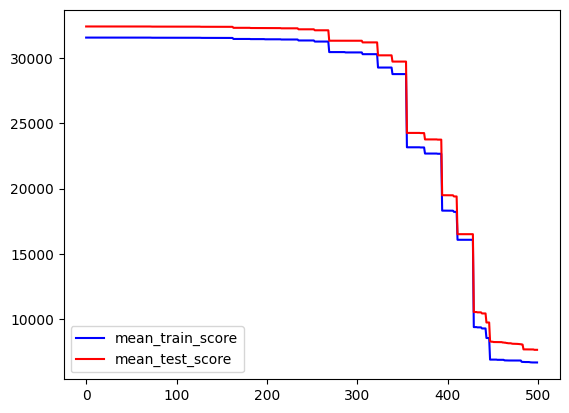

In [ ]:
enc_cv.cv_results_.keys()
plt.figure()
plt.plot(sorted(enc_cv.cv_results_['mean_train_score']*-1, reverse=True), color='blue')
plt.plot(sorted(enc_cv.cv_results_['mean_test_score']*-1, reverse=True), color='red')
plt.legend(['mean_train_score', 'mean_test_score'])
plt.show()

Here we can see that the model constantly decreases its error value, and the test and train errors are not far apart. This model performs well and is not over- nor underfitting.

In [ ]:
# the hyperparameter under which our model performed best
print(enc_cv.best_params_)

# here we get the best score of
enc_mae=(enc_cv.best_score_)*-1
print(enc_mae)

{'tol': 0.001, 'n_alphas': 1000, 'l1_ratio': 1, 'eps': 0.1}
7631.397969633569


Our elastic net model performs better than our linear model. But we need to mention that the model is more compute-intensive. Even though the model performs better, when compute time is critical, we might use another model. In this project, compute time can be disregarded; therefore, this model is currently our best-performing model.

## SGD Regressor

### This model will be used when the data set/samples are below 100.000

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg=SGDRegressor(random_state=101)

param_sgd={'loss':['squared_error','huber','epsilon','epsilon_insensitive','squared_epsilon_insensitive'],
          'penalty':['l2','l1','elasticnet',None], 'alpha':[0.0001,0.001,0.01,0.1,1,2],
           'l1_ratio':[0,0.1,0.5,0.75,0.9,0.99,1], 'tol':[0.0001,0.001,0.01,0.1], 'epsilon':[0.001,0.01,0.1,1],
          'learning_rate':['constant','optimal','invscaling','adaptive'], 'eta0':[0.0001,0.001,0.01,0.1,1],
          'power_t':[0.01,0.1,0.25,0.5,0.75,0.9,0.99,1], 'validation_fraction':np.linspace(0,1,10),
          'n_iter_no_change':[2,3,4,5], 'average':[True,False]}

sgd_reg_cv=RandomizedSearchCV(sgd_reg, param_distributions=param_sgd, n_iter=500,
                          scoring='neg_mean_absolute_error', cv=cv, return_train_score=True)

In [ ]:
sgd_reg_cv.fit(scaled_X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   estimator=SGDRegressor(random_state=101), n_iter=500,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1,
                                                  2],
                                        'average': [True, False],
                                        'epsilon': [0.001, 0.01, 0.1, 1],
                                        'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                                        'l1_ratio': [0, 0.1, 0.5, 0.75, 0.9,
                                                     0.99, 1],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscal...
                                                 'squared_epsilon_insensitive'],
                                        'n_iter_no_change': [2, 3, 4, 5],
                                        'penalty': ['l2', 'l1', 'elasticnet',
                                                    None],
                                        'power_t': [0.01, 0.1, 0.25, 0.5, 0.75,
                                                    0.9, 0.99, 1],
                                        'tol': [0.0001, 0.001, 0.01, 0.1],
                                        'validation_fraction': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
                   return_train_score=True, scoring='neg_mean_absolute_error')

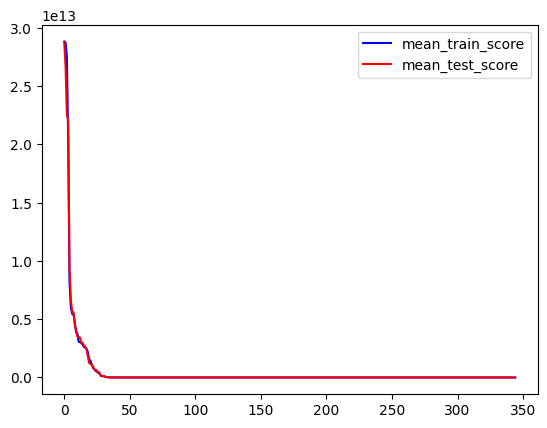

In [ ]:
sgd_reg_cv.cv_results_.keys()

train=np.array(sgd_reg_cv.cv_results_['mean_train_score'])
nan_array_train=np.isnan(train)
not_nan_array_train=~ nan_array_train
train2=train[not_nan_array_train]

test=np.array(sgd_reg_cv.cv_results_['mean_test_score'])
nan_array_test=np.isnan(test)
not_nan_array_test=~ nan_array_test
test2=test[not_nan_array_test]

plt.figure()
plt.plot(sorted((train2)*-1, reverse=True), color='blue')
plt.plot(sorted((test2)*-1, reverse=True), color='red')
plt.legend(['mean_train_score', 'mean_test_score'])
plt.show()

Here we would rather go with underfitting, because the model is not able to catch the complex pattern of the data.

In [ ]:
print(sgd_reg_cv.best_params_)
sgd_mae=(sgd_reg_cv.best_score_)*-1
print(sgd_mae)

{'validation_fraction': 0.8888888888888888, 'tol': 0.1, 'power_t': 1, 'penalty': 'elasticnet', 'n_iter_no_change': 3, 'loss': 'squared_epsilon_insensitive', 'learning_rate': 'constant', 'l1_ratio': 0, 'eta0': 0.01, 'epsilon': 0.1, 'average': False, 'alpha': 0.1}
8476.523209475337


The model does not perform better than the elastic model. Next, we will check how a LinearSVM will perform.

# LinearSVM

### The difference between LinearSVM and a regular SVM is that LinearSVM only uses a linear kernel, unlike SVM, which can take full advantage of the kernel trick and uses all possible kernels if needed.
##### Note=> LinearSVM allows to have more flexibility when it comes to the penalties and loss functions

In [ ]:
from sklearn.svm import LinearSVR
svr=LinearSVR(random_state=101)

paramgrid={'epsilon':[0.0001, 0.001, 0.01,0.1,0.5,1], 'C': [0.01,0.1, 0.5, 0.7, 1],
           'tol':[0.001,0.01,0.1,1], 'loss':['epsilon_insensitive', 'squared_epsilon_insensitive'],
           'intercept_scaling':[0.1,0.2,0.4,0.6,0.8,1]}

lin_svr_cv=RandomizedSearchCV(LinearSVR(), param_distributions=paramgrid, scoring='neg_mean_absolute_error',
                                n_iter=500,cv=cv, error_score='raise', return_train_score=True)

In [ ]:
lin_svr_cv.fit(scaled_X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   error_score='raise', estimator=LinearSVR(), n_iter=500,
                   param_distributions={'C': [0.01, 0.1, 0.5, 0.7, 1],
                                        'epsilon': [0.0001, 0.001, 0.01, 0.1,
                                                    0.5, 1],
                                        'intercept_scaling': [0.1, 0.2, 0.4,
                                                              0.6, 0.8, 1],
                                        'loss': ['epsilon_insensitive',
                                                 'squared_epsilon_insensitive'],
                                        'tol': [0.001, 0.01, 0.1, 1]},
                   return_train_score=True, scoring='neg_mean_absolute_error')

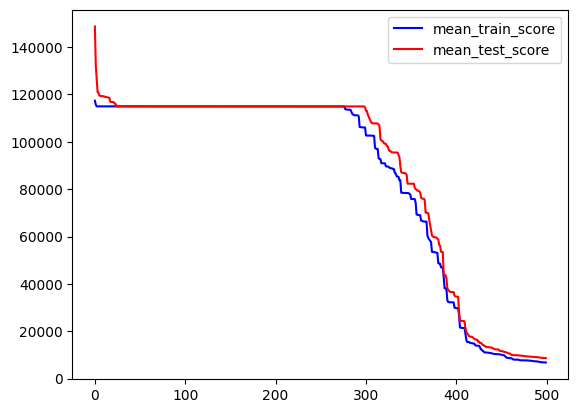

In [ ]:
lin_svr_cv.cv_results_.keys()
plt.figure()
plt.plot(sorted(lin_svr_cv.cv_results_['mean_train_score']*-1, reverse=True), color='blue')
plt.plot(sorted(lin_svr_cv.cv_results_['mean_test_score']*-1, reverse=True), color='red')
plt.legend(['mean_train_score', 'mean_test_score'])
plt.show()

Here we can see that the model constantly decreases its error value, and the test and train errors are not far apart. This model performs well and is not over- nor underfitting.

In [ ]:
print(lin_svr_cv.best_params_)
lin_svr_mae=(lin_svr_cv.best_score_)*-1
print(lin_svr_mae)

{'tol': 0.01, 'loss': 'squared_epsilon_insensitive', 'intercept_scaling': 1, 'epsilon': 0.0001, 'C': 1}
8674.772926608342


Our elastic net model is still the best perfoming model.

## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(random_state=101)

param_dt={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
           'max_depth': [1,2,3,4,5,6],
           'min_samples_split':[1,2,3,4], 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
           'max_features':['auto', 'sqrt', 'log2', 'None'],
           'max_leaf_nodes':[10,20,30,40,50,60,70,80,90]}

tree_reg_cv=RandomizedSearchCV(tree_reg, param_distributions=param_dt,
                               scoring='neg_mean_absolute_error', n_iter=500,cv=cv, return_train_score=True)

In [ ]:
tree_reg_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   estimator=DecisionTreeRegressor(random_state=101),
                   n_iter=500,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3, 4, 5, 6],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         'None'],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4]},
                   return_train_score=True, scoring='neg_mean_absolute_error')

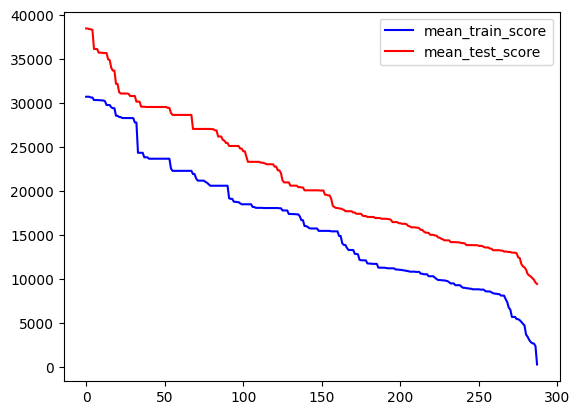

In [ ]:
tree_reg_cv.cv_results_.keys()

train=np.array(tree_reg_cv.cv_results_['mean_train_score'])
nan_array_train=np.isnan(train)
not_nan_array_train=~ nan_array_train
train2=train[not_nan_array_train]

test=np.array(tree_reg_cv.cv_results_['mean_test_score'])
nan_array_test=np.isnan(test)
not_nan_array_test=~ nan_array_test
test2=test[not_nan_array_test]

plt.figure()
plt.plot(sorted((train2)*-1, reverse=True), color='blue')
plt.plot(sorted((test2)*-1, reverse=True), color='red')
plt.legend(['mean_train_score', 'mean_test_score'])
plt.show()

Here we can see that the model constantly decreases its error value, and the test and train errors are not far apart. This model performs well and is not over- nor underfitting.

In [ ]:
print(tree_reg_cv.best_params_)
# Average MAE of the decision tree regressor
dt_reg_mae=(tree_reg_cv.best_score_)*-1
print(dt_reg_mae)

{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_leaf_nodes': 40, 'max_features': 'auto', 'max_depth': 6, 'criterion': 'friedman_mse'}
9422.942208333334


After performing a decision tree model, we see that the elastic net model is still the best-performing model. Finally, we come to our last model, the RandomForestRegression.

## RandomForestRegression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

for_reg=RandomForestRegressor(random_state=101)

param_rf={'n_estimators':[10,50,100,250,500,750,1000],
           'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
           'max_depth': [1,2,3,4,5,6,7,8],
           'min_samples_split':[1,2,3,4,6,8], 'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
           'max_features':['auto', 'sqrt', 'log2', 'None'],
           'max_leaf_nodes':[10,20,30,40,50,60,70,80,90], 'bootstrap':[True, False]}

rf_cv=RandomizedSearchCV(for_reg, scoring='neg_mean_absolute_error', param_distributions=param_rf,
                         n_iter=500,cv=cv, random_state=101, return_train_score=True)

In [ ]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=101, shuffle=True),
                   estimator=RandomForestRegressor(random_state=101),
                   n_iter=500,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         'None'],
                                        'max_leaf_nodes': [10, 20, 30, 40, 50,
                                                           60, 70, 80, 90],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 6, 8],
                                        'n_estimators': [10, 50, 100, 250, 500,
                                                         750, 1000]},
                   random_state=101, return_train_score=True,
                   scoring='neg_mean_absolute_error')

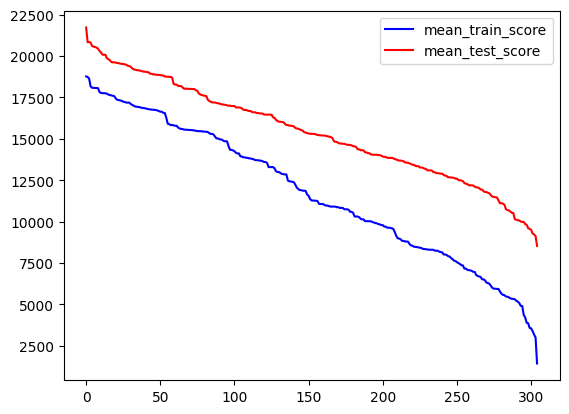

In [ ]:
rf_cv.cv_results_.keys()

train=np.array(rf_cv.cv_results_['mean_train_score'])
nan_array_train=np.isnan(train)
not_nan_array_train=~ nan_array_train
train2=train[not_nan_array_train]

test=np.array(rf_cv.cv_results_['mean_test_score'])
nan_array_test=np.isnan(test)
not_nan_array_test=~ nan_array_test
test2=test[not_nan_array_test]

plt.figure()
plt.plot(sorted((train2)*-1, reverse=True), color='blue')
plt.plot(sorted((test2)*-1, reverse=True), color='red')
plt.legend(['mean_train_score', 'mean_test_score'])
plt.show()

The RandomForest model tends to overfit because our mean_train and mean_test score are relatively far apart.

In [ ]:
print(rf_cv.best_params_)
rf_mae=(rf_cv.best_score_)*-1
print(rf_mae)

{'n_estimators': 10, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_leaf_nodes': 10, 'max_features': 'auto', 'max_depth': 3, 'criterion': 'friedman_mse', 'bootstrap': True}
8533.437506864031


The RandomForestRegressor is not performing better than the elastic model. Also, it is important to mention that the model is very compute-intensive.

Let's use our findings and put them in a data frame to get a better overview.

In [ ]:
find={'multiple_linear_regression':lr_mae, 'elastic_net':enc_mae, 'sgd_regressor':sgd_mae,
     'linear_svm':lin_svr_mae, 'decision_tree_regression':dt_reg_mae,
     'random_forest':rf_mae}
results=pd.DataFrame.from_dict(find, orient='index').rename(columns={0:'best_score_mean_absolute_error'})
results

,best_score_mean_absolute_error
multiple_linear_regression,8575.255446
elastic_net,7631.397970
sgd_regressor,8476.523209
linear_svm,8674.772927
decision_tree_regression,9422.942208
random_forest,8533.437507


In [ ]:
results[results['best_score_mean_absolute_error']==results['best_score_mean_absolute_error'].min()]

,best_score_mean_absolute_error
elastic_net,7631.39797


As we can see, our best model is the elastic net model. Here we have accomplished the lowest mean absolute error. These scores were gathered through cross-validation and display the best performance of our models to unseen data.

Let's finalize our model. This will be done by training the best model, in our case, the elastic net model.

# Finalizing the Project
## Final Model

In [ ]:
enc_cv.best_params_

{'tol': 0.001, 'n_alphas': 1000, 'l1_ratio': 1, 'eps': 0.1}

In [ ]:
final_model=ElasticNetCV(tol=0.001, n_alphas=1000, l1_ratio=1, eps=0.1, random_state=101)
final_model.fit(scaled_X_train, y_train)

ElasticNetCV(eps=0.1, l1_ratio=1, n_alphas=1000, random_state=101, tol=0.001)

In [ ]:
# that is the final performance of our model
from sklearn.metrics import mean_absolute_error
y_pred=final_model.predict(scaled_X_test)

print(mean_absolute_error(y_test, y_pred))

7846.779795603341


In [ ]:
# these are the required input values for our model
X.iloc[1:2]

,r&d spend,administration,marketing spend,state_Florida,state_New York
1,162597.7,151377.59,443898.53,0,0


We got the first row just as a reference, to know which values have to be added to predict correctly.

In [ ]:
new_data=[[162597.7, 151377.59, 443898.53,0,0]]
# we need to scale the values the same way as we scale the X_test values
test=scale.transform(new_data)
final_model.predict(test)

array([182465.46664212])

In [ ]:
df.head(5)

,r&d spend,administration,marketing spend,state,profit,profit_category
0,165349.20,136897.80,471784.10,New York,192261.83,great
1,162597.70,151377.59,443898.53,California,191792.06,great
2,153441.51,101145.55,407934.54,Florida,191050.39,great
3,144372.41,118671.85,383199.62,New York,182901.99,great
4,142107.34,91391.77,366168.42,Florida,166187.94,great


In [ ]:
new_data_2=[[142107.34, 91391.77, 366168.42,1,0]]
test2=scale.transform(new_data_2)
final_model.predict(test2)

array([166123.41139901])

In [ ]:
new_data_3=[[153441.51, 101145.55, 407934.54,1,0]]
test3=scale.transform(new_data_3)
final_model.predict(test3)

array([175143.77642429])

In [ ]:
from joblib import dump, load

In [ ]:
dump(final_model, 'predicting_profit_start_ups.joblib')

['predicting_profit_start_ups.joblib']

In [ ]:
# when it comes to the state features

input_data=[[input('How much was on r&d spend?: '), input('How much was on administration spend?: '),
             input('How much was on marketing spend?: '),input('Is the start-up in Florida?: '),
             input('Is the start-up in New York?: ')]]
input_test=scale.transform(input_data)
final_model.predict(input_test)

How much was on r&d spend?: 180000
How much was on administration spend?: 70000
How much was on marketing spend?: 250000
Is the start-up in Florida?: 1
Is the start-up in New York?: 0


array([192290.68765789])

# Conclusion

This model will allow us to predict the profit of start-ups from Florida, California and New York relatively well.

It is important to mention that we have built relatively simple models, and we did not include a feature importance analysis. This means that a feature importance analysis could be performed in future studies to increase the model's accuracy. Another important aspect is that we have a limited amount of data which negatively affects the accuracy of the models because our model can only learn from a small amount of data, which makes it difficult to predict the correct amount.

Overall, we have created decent models, and we can predict a realistic profit for the start-ups.